In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

### Import Data dan Inception data

In [5]:
df = pd.read_csv('../data/data_retail.csv', sep=';')
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


change first_transaction and last_transaction into datatime type

In [7]:
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 6.1+ MB


### Churn Customers
1. Transaksi paling terakhir kapan dilakukan
2. Klasifikasikan mana kostumer yang berstatus churn dan mana yang tidak

In [11]:
# transaksi terakhir
print(min(df['First_Transaction']))
print(max(df['Last_Transaction']))

2013-03-08 07:53:46.296999936
2019-02-01 23:57:57.286000128


In [12]:
# klasifikasi churn customer

df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,1,1,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False


#### Hapus kolom yang tidak diperlukan

In [14]:
del df['no']
del df['Row_Num']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Customer_ID                 100000 non-null  int64         
 1   Product                     100000 non-null  object        
 2   First_Transaction           100000 non-null  datetime64[ns]
 3   Last_Transaction            100000 non-null  datetime64[ns]
 4   Average_Transaction_Amount  100000 non-null  int64         
 5   Count_Transaction           100000 non-null  int64         
 6   is_churn                    100000 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 5.3+ MB


### Customer Acquisition by year

In [15]:
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,Year_First_Transaction,Year_Last_Transaction
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False,2016,2018
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False,2014,2018
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False,2017,2019
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False,2017,2019
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False,2015,2018


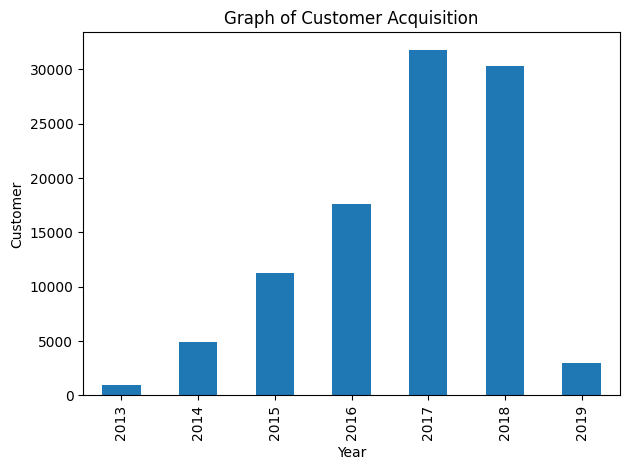

In [19]:
df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title="Graph of Customer Acquisition")
plt.xlabel('Year')
plt.ylabel('Customer')
plt.tight_layout()
plt.show()

### Transaction by year

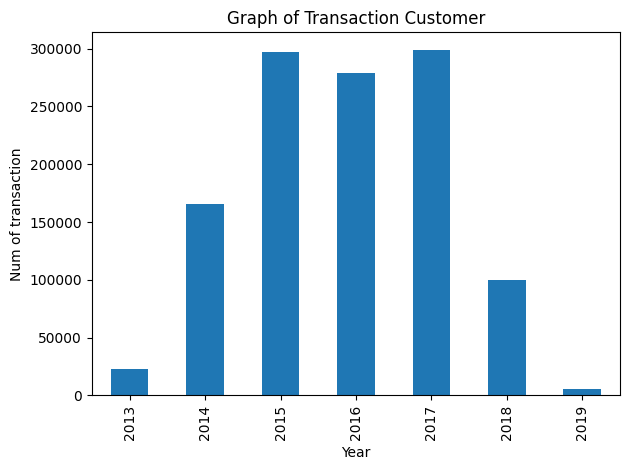

In [20]:
df_transaction_by_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_transaction_by_year.plot(x='Year_First_Transcation', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')

plt.xlabel('Year')
plt.ylabel('Num of transaction')
plt.tight_layout()
plt.show()

### Average Transaction Amount by Year

In [21]:
import seaborn as sns

C:\Users\mrdan\AppData\Local\Temp\ipykernel_2792\510177456.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.pointplot(data=df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(),


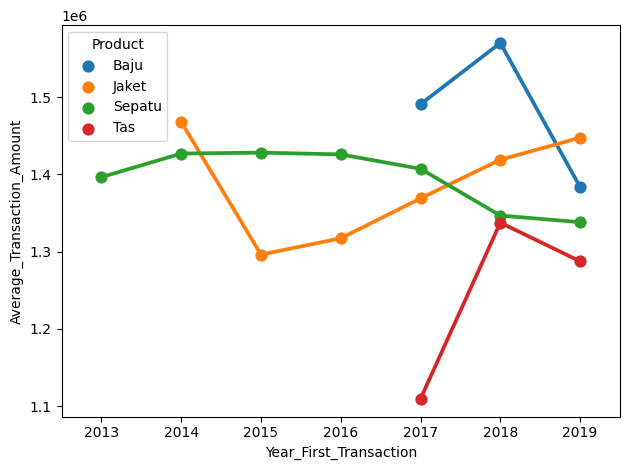

In [24]:
sns.pointplot(data=df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(),
              x='Year_First_Transaction',
              y='Average_Transaction_Amount',
              hue='Product')
plt.tight_layout()
plt.show()

### Proporsi churned churned customer untuk setiap produk

In [26]:
# pivot data dengan pivot_table
df_pivot = df.pivot_table(index='is_churn',
                          columns='Product',
                          values='Customer_ID',
                          aggfunc='count',
                          fill_value=0)

# proportion churn by produk
plot_product = df_pivot.count().sort_values(ascending=False).head(5).index
plot_product

Index(['Baju', 'Jaket', 'Sepatu', 'Tas'], dtype='object', name='Product')

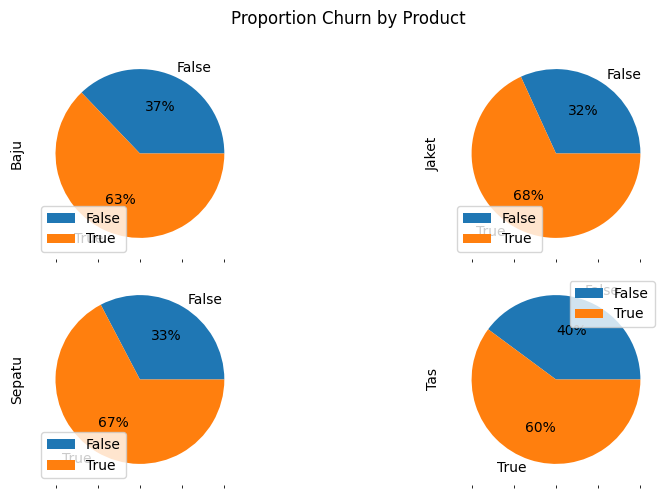

In [37]:
# Plot pie chart
df_pivot = df_pivot.reindex(columns=plot_product)
df_pivot.plot.pie(subplots=True,
                  figsize=(10, 5),
                  layout=(-1, 2),
                  autopct='%1.0f%%',
                  title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

### Distribusi kategorisasi count transaction

In [38]:
# kategorikan jumlah transaksi
def trans_cate(row):
    if row['Count_Transaction'] == 1:
        val = '1.1'
    elif 1 < row['Count_Transaction'] <= 3:
        val = '2.2 - 3'
    elif 3 < row['Count_Transaction'] <= 6:
        val = '3.4 - 6'
    elif 6 < row['Count_Transaction'] <= 10:
        val = '4.7 - 10'
    else:
        val = '5.10+'

    return val

In [39]:
df['Count_Transaction_Group'] = df.apply(trans_cate, axis=1)

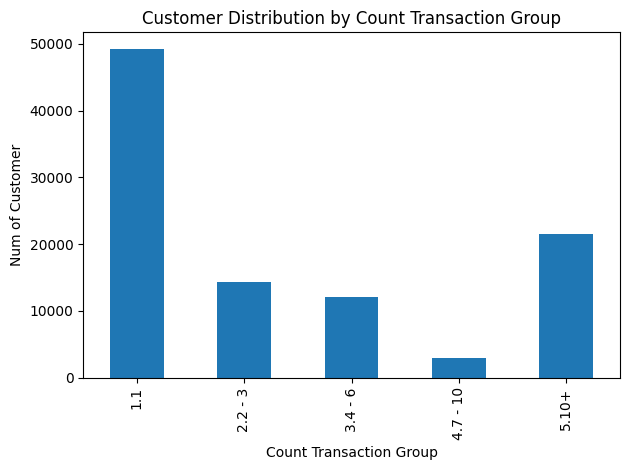

In [40]:
df_count_transaction = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()

df_count_transaction.plot(x='Count_Transaction_Group',
                          y='Customer_ID',
                          kind='bar',
                          title='Customer Distribution by Count Transaction Group'
)
plt.xlabel('Count Transaction Group')
plt.ylabel('Num of Customer')
plt.tight_layout()
plt.show()

### Distribution Category average transaction amount

In [45]:
# fungsi mean transaksi
def avg_trans(row):
    if 100000 <= row['Average_Transaction_Amount'] <= 200000:
        val = '1. 100.000 - 250.000'
    elif 250000 <= row['Average_Transaction_Amount'] <= 500000:
        val = '2. 250.000 - 500.000'
    elif 500000 <= row['Average_Transaction_Amount'] <= 750000:
        val = '3. 500.000 - 750.000'
    elif 750000 <= row['Average_Transaction_Amount'] <= 1000000:
        val = '4. 750.000 - 1.000.000'
    elif 1000000 <= row['Average_Transaction_Amount'] <= 2500000:
        val = '5. 1.000.000 - 2.500.000'
    elif 2500000 <= row['Average_Transaction_Amount'] <= 5000000:
        val = '6. 2.500.000 - 5.000.000'
    elif 5000000 <= row['Average_Transaction_Amount'] <= 10000000:
        val = '7. 5.000.000 - 10.000.000'
    else:
        val = '8. 10.000.000+'

    return val

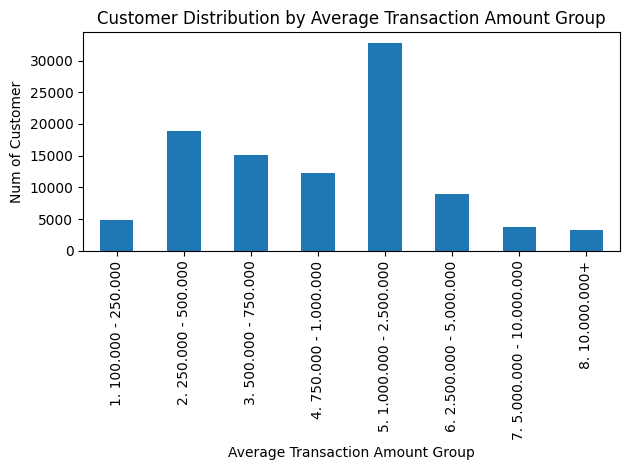

In [46]:
df['Avg_Transaction_Amount_Group'] = df.apply(avg_trans, axis=1)

df_avg_trans = df.groupby(['Avg_Transaction_Amount_Group'])['Customer_ID'].count()
df_avg_trans.plot(x='Avg_Transaction_Amount_Group',
                  y='Customer_ID',
                  kind='bar',
                  title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average Transaction Amount Group')
plt.ylabel('Num of Customer')
plt.tight_layout()
plt.show()

## Modelling
### Feature Columns and Target

In [76]:
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_Last_Transaction']

feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

X = df[feature_columns]
y = df['is_churn'].astype('int')

### Splitting train and test

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# y_train = sc.fit_transform(y_train)
# y_test = sc.transform(y_test)

In [80]:
classifier = GaussianNB()

classifier.fit(X_train, y_train)

GaussianNB()

In [81]:
y_pred = classifier.predict(X_test)


In [82]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[ 2263  6068]
 [  524 16145]]


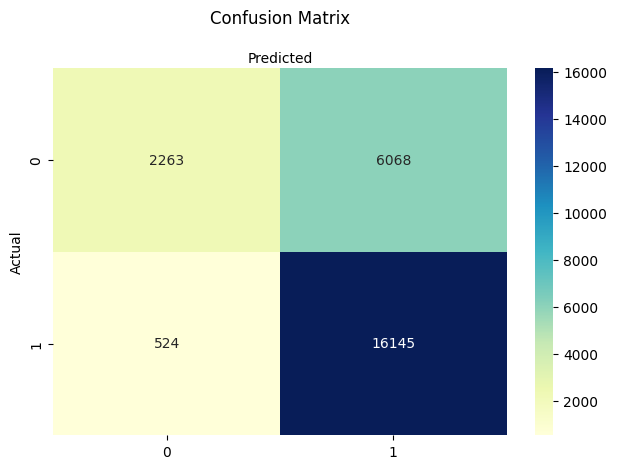

In [83]:
class_names = [0, 1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


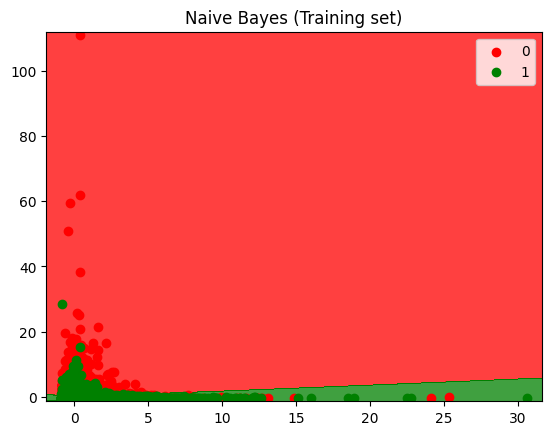

In [101]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')

plt.legend()
plt.show()